**Publishers (2)**

1. What factors influence the height of the buyer_bid?
2. Can we (publisher) make more profit by changing the size of the advertisements?
3. What is the most profitable balance between the time visitors spend on our website and the space taken up by advertisements?
4. Which ad has highest profit (media_cost)
5. How much unique viewers in total?
6. What devices(system) are used most? Does this influence the profit?

Factors: creative_size_small/large/medium, buyer_bid, device_type, operating_system, impressions_above_fold

In [5]:
import pandas as pd
import sqlite3
import numpy as np

path = "../Data/"
data = pd.read_csv(path + "DataChallenge2019_GreenhouseGroup_Bidding_Algorithms_Tests.csv",sep=";")

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
# db_file = open('db.db','w+')
# conn = sqlite3.connect('db.db',isolation_level = None)
# cur = conn.cursor()

In [3]:
# Question 1

the 0 in small: 180
the 0 in large: 230


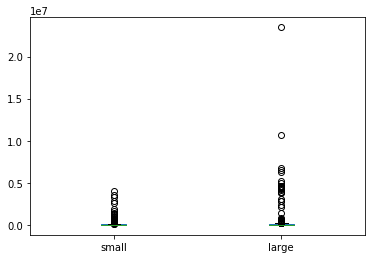

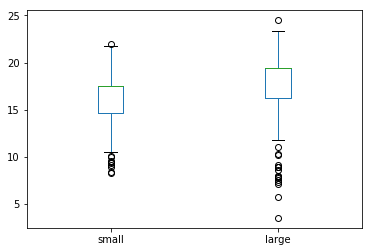

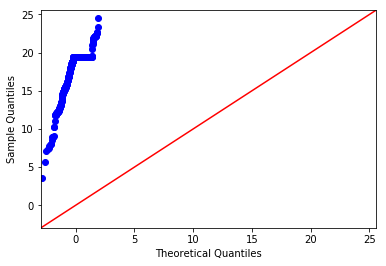

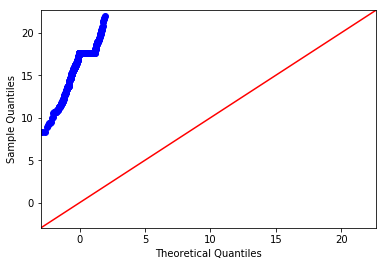

MannwhitneyuResult(statistic=59117.0, pvalue=1.0)
RanksumsResult(statistic=-11.811941840095376, pvalue=3.386484424364486e-32)


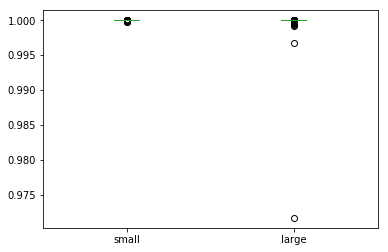

In [4]:
# Question 2
from scipy.stats import ttest_ind,ranksums,mannwhitneyu
import statsmodels.api as sm
import pylab
# data_sml = data[['media_cost','creative_size_small','creative_size_medium','creative_size_large']]
# # rearrange data with the proportion of small medium and large of total media cost
# # rearrange[small][1] = small/(small+medium+large) * media_cost
# rearrange = pd.DataFrame(columns=['small','medium','large'])
# rearrange['small'] = data_sml['creative_size_small']*(data_sml['creative_size_small']+data_sml['creative_size_medium']+data_sml['creative_size_large'])\
#                     *data_sml['media_cost']
# rearrange['medium'] = data_sml['creative_size_medium']*(data_sml['creative_size_small']+data_sml['creative_size_medium']+data_sml['creative_size_large'])\
#                     *data_sml['media_cost']
# rearrange['large'] = data_sml['creative_size_large']*(data_sml['creative_size_small']+data_sml['creative_size_medium']+data_sml['creative_size_large'])\
#                     *data_sml['media_cost']
# # value are too small, applying log transformation
# rearrange.plot(kind='box')
# rearrange['small'].replace(to_replace=0,value = 1,inplace = True)
# rearrange['medium'].replace(to_replace=0,value = 1,inplace = True)
# rearrange['large'].replace(to_replace=0,value = 1,inplace = True)
# rearrange_normal = rearrange.applymap(np.log2)
# rearrange_normal.plot(kind='box')

# removed creative_size_medium since too less data

import math

def sigmoid(x):
    return (1.0+np.tanh(x/2.0))/2.0

data_sml = data[['media_cost','creative_size_small','creative_size_medium','creative_size_large']]
# rearrange data with the proportion of small and large of total media cost
# rearrange[small][1] = small/(small+medium+large) * media_cost
rearrange = pd.DataFrame(columns=['small','large'])
rearrange['small'] = data_sml['creative_size_small']/(data_sml['creative_size_small']+data_sml['creative_size_medium']+data_sml['creative_size_large'])\
                    *data_sml['media_cost']
rearrange['large'] = (data_sml['creative_size_medium']+data_sml['creative_size_large'])/(data_sml['creative_size_small']+data_sml['creative_size_medium']+data_sml['creative_size_large'])\
                    *data_sml['media_cost']

print('the 0 in small:',len(rearrange[rearrange['small'] == 0]['small']))
print('the 0 in large:',len(rearrange[rearrange['large'] == 0]['large']))


# value are too small, applying log transformation
rearrange.plot(kind='box')

# replace 0 with 1
# rearrange['small'].replace(to_replace=0,value = 1,inplace = True)
# rearrange['large'].replace(to_replace=0,value = 1,inplace = True)

# replace 0 with average
rearrange['small'].replace(to_replace=0,value = rearrange[rearrange['small'] != 0]['small'].mean(),inplace = True)
rearrange['large'].replace(to_replace=0,value = rearrange[rearrange['large'] != 0]['large'].mean(),inplace = True)


rearrange_normal = rearrange.applymap(np.log2)
rearrange_normal.plot(kind='box')

sm.qqplot(rearrange_normal['large'],line='45')
pylab.show()

sm.qqplot(rearrange_normal['small'],line='45')
pylab.show()

rearrange_sigmoid = rearrange_normal.applymap(lambda x:sigmoid(x))
rearrange_sigmoid.plot(kind='box')
# since dataset are not normal nor have same variance
# H0: small ad and large ad have same income
# H1: small ad has more income than larger ad
# Mann-Whitney U test on small and large

print(mannwhitneyu(rearrange_normal['small'],rearrange_normal['large'],use_continuity=False,alternative='greater'))
print(ranksums(rearrange['small'],rearrange['large']))

# I feels the result doesn't make sense, I feels the dataset is inbalanced, since I replaced all 0 value to average, the 0 can be more in "large" part which will resulting larger ad makes more money

the 0 in small: 180 over all 463
the 0 in medium: 387 over all 463
the 0 in large: 294 over all 463


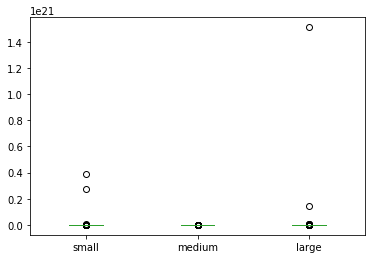

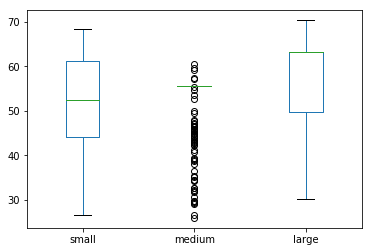

In [21]:
# SIZE OF ADVERTISEMENT WITH MEDIUM
from scipy.stats import ttest_ind,ranksums,mannwhitneyu
import statsmodels.api as sm
import pylab
# data_sml = data[['media_cost','creative_size_small','creative_size_medium','creative_size_large']]
# # rearrange data with the proportion of small medium and large of total media cost
# # rearrange[small][1] = small/(small+medium+large) * media_cost
# rearrange = pd.DataFrame(columns=['small','medium','large'])
# rearrange['small'] = data_sml['creative_size_small']*(data_sml['creative_size_small']+data_sml['creative_size_medium']+data_sml['creative_size_large'])\
#                     *data_sml['media_cost']
# rearrange['medium'] = data_sml['creative_size_medium']*(data_sml['creative_size_small']+data_sml['creative_size_medium']+data_sml['creative_size_large'])\
#                    *data_sml['media_cost']
# rearrange['large'] = data_sml['creative_size_large']*(data_sml['creative_size_small']+data_sml['creative_size_medium']+data_sml['creative_size_large'])\
#                     *data_sml['media_cost']
# # value are too small, applying log transformation
# rearrange.plot(kind='box')
# rearrange['small'].replace(to_replace=0,value = 1,inplace = True)
# rearrange['medium'].replace(to_replace=0,value = 1,inplace = True)
# rearrange['large'].replace(to_replace=0,value = 1,inplace = True)
# rearrange_normal = rearrange.applymap(np.log2)
# rearrange_normal.plot(kind='box')

# removed creative_size_medium since too less data

import math

def sigmoid(x):
    return (1.0+np.tanh(x/2.0))/2.0

data_sml = data[['media_cost','creative_size_small','creative_size_medium','creative_size_large']]
# rearrange data with the proportion of small and large of total media cost
# rearrange[small][1] = small/(small+medium+large) * media_cost
rearrange = pd.DataFrame(columns=['small','medium','large'])
rearrange['small'] = data_sml['creative_size_small']*(data_sml['creative_size_small']+data_sml['creative_size_medium']+data_sml['creative_size_large'])\
                    *data_sml['media_cost']
rearrange['medium'] = data_sml['creative_size_medium']*(data_sml['creative_size_small']+data_sml['creative_size_medium']+data_sml['creative_size_large'])\
                    *data_sml['media_cost']
rearrange['large'] = data_sml['creative_size_large']*(data_sml['creative_size_small']+data_sml['creative_size_medium']+data_sml['creative_size_large'])\
                    *data_sml['media_cost']

print('the 0 in small:',len(rearrange[rearrange['small'] == 0]['small']),"over all",len(rearrange['small']))
print('the 0 in medium:',len(rearrange[rearrange['medium'] == 0]['medium']),"over all",len(rearrange['medium']))
print('the 0 in large:',len(rearrange[rearrange['large'] == 0]['large']),"over all",len(rearrange['large']))


# value are too small, applying log transformation
rearrange.plot(kind='box')

# replace 0 with 1
# rearrange['small'].replace(to_replace=0,value = 1,inplace = True)
# rearrange['large'].replace(to_replace=0,value = 1,inplace = True)

# replace 0 with average
rearrange['small'].replace(to_replace=0,value = rearrange[rearrange['small'] != 0]['small'].mean(),inplace = True)
rearrange['medium'].replace(to_replace=0,value = rearrange[rearrange['medium'] != 0]['medium'].mean(),inplace = True)
rearrange['large'].replace(to_replace=0,value = rearrange[rearrange['large'] != 0]['large'].mean(),inplace = True)


rearrange_normal = rearrange.applymap(np.log2)
rearrange_normal.plot(kind='box')

In [5]:
# Question 3
# What is the most profitable balance between the time visitors spend on our website and the space taken up by advertisements?
# dataset not support, no time data available

In [6]:
# Question 4
data[['campaign_id','media_cost']].sort_values(by = "media_cost",ascending = False).head(1)

# campagin id 22056912.0 has highest media cost 2.347801e+07

,campaign_id,media_cost
71,22056912.0,2.347801e+07


In [7]:
# Question 5
data.unique_user_inview.sum()

36236977.0

C:\Users\RogerSurface\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


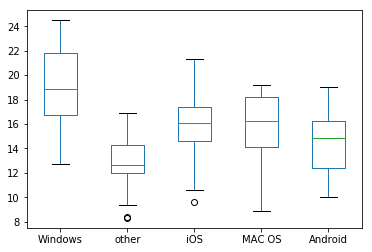

MannwhitneyuResult(statistic=4742.0, pvalue=5.879024104779793e-05)
MannwhitneyuResult(statistic=4566.0, pvalue=0.0004959752447002944)


In [23]:
# Question 6
from scipy.stats import ttest_ind,ranksums,mannwhitneyu
import matplotlib.pyplot as plt
q6_df = data[['operating_system','media_cost']]

# remove NAs
q6_df.dropna(inplace=True)

# create df
os_list= q6_df.operating_system.unique()
q6_rearrange = pd.DataFrame(columns=os_list)

for os in os_list:
    q6_rearrange[os] = q6_df[q6_df['operating_system']==os].reset_index()['media_cost']
#     q6_rearrange[os].replace(to_replace=np.nan,value = q6_rearrange[os].mean(skipna=True),inplace = True)

# apply log transformation
q6_rearrange_normal = q6_rearrange.applymap(np.log2)

# box plot
# before log normal
# q6_rearrange.plot(kind ='box')
# plt.show()

# after log normal
q6_rearrange_normal.plot(kind ='box') 
plt.show()

# # remove outlier
# import statsmodels.api as sm
# import pylab
# for os in os_list:
#     q6_rearrange_normal[os] = remove_outlier(q6_rearrange_normal,os)
#     sm.qqplot(q6_rearrange_normal[os],line='45')
#     pylab.show()
#     q6_rearrange_normal.plot(kind ='box')
#     plt.show()
## the outliers are kind play important role that makes difference, so they are mislabed as outliers

print(mannwhitneyu(q6_rearrange_normal['Windows'],q6_rearrange_normal['MAC OS'],use_continuity=False,alternative='greater'))
print(mannwhitneyu(q6_rearrange_normal['iOS'],q6_rearrange_normal['Android'],use_continuity=False,alternative='greater'))

In [18]:
q6_rearrange_normal.head()

,Windows,other,iOS,MAC OS,Android
0,21.953110,15.231837,15.112484,19.071351,18.095785
1,21.750677,15.205525,14.572857,19.167985,10.644130
2,16.786256,11.718273,16.370360,13.559534,15.842591
3,17.036055,11.277324,10.885817,13.175303,15.845446
4,16.837759,14.499181,10.884088,13.615173,18.089357


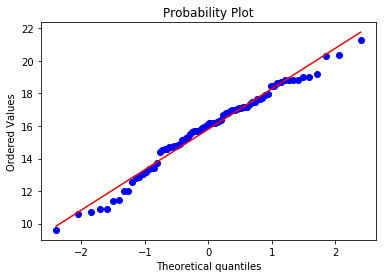

In [20]:
# qq plot
import numpy as np 
import pylab 
import scipy.stats as stats

# measurements = np.random.normal(loc = 20, scale = 5, size=100)  

stats.probplot(q6_rearrange_normal['iOS'], dist="norm", plot=pylab)
pylab.show()

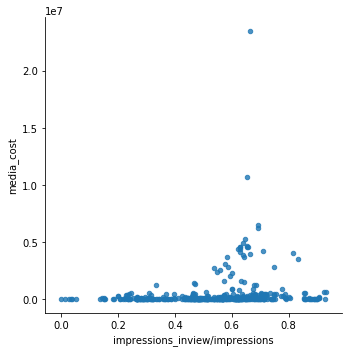

In [78]:
# can impression inview influence media cost?

re_diff = data[['impressions_inview/impressions','media_cost']]#, 'buyer_bid']]
re_diff = re_diff[re_diff['impressions_inview/impressions'] != 0]


# re_diff = re_diff.applymap(np.log2)

x = re_diff["impressions_inview/impressions"]

import seaborn as sns
sns.lmplot(x="impressions_inview/impressions",y="media_cost",data=re_diff,fit_reg=False,size = 5,scatter_kws={'s':20}) 